<a href="https://colab.research.google.com/github/NithderP/NithderP/blob/main/Deep_Learning_Project_work_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Business Question:**
Using a deep learning model(CNN) for plant seedlings classification through supervised learning.

**Data Description:**

The dataset contains images of unique plants belonging to 12 different species at several growth stages.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

**Dataset:**

- The dataset was downloaded from Kaggle
- The data file names are:
    - images.npy
    - Label.csv




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import itertools
import seaborn as sns
import numpy as np
import tensorflow as tf

from glob import glob
from tensorflow.keras.models import Sequential,Model # Sequential api for sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, Input, LeakyReLU
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
seed = 7

### **Reading the dataset**

In [ ]:
# Load the image file of dataset
path = '/content/drive/MyDrive/CNN/'

images = np.load(path + 'images.npy')

# Load the labels file of dataset
labels = pd.read_csv(path + 'Labels.csv')

**Data Exploration**

In [ ]:
## show images size
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750  images of shape 128 x 128 each. As mentioned, each image is an RGB image having 3 channels

In [ ]:
# Convert labels to numerical format
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels['Label'])
categorical_labels = to_categorical(encoded_labels)

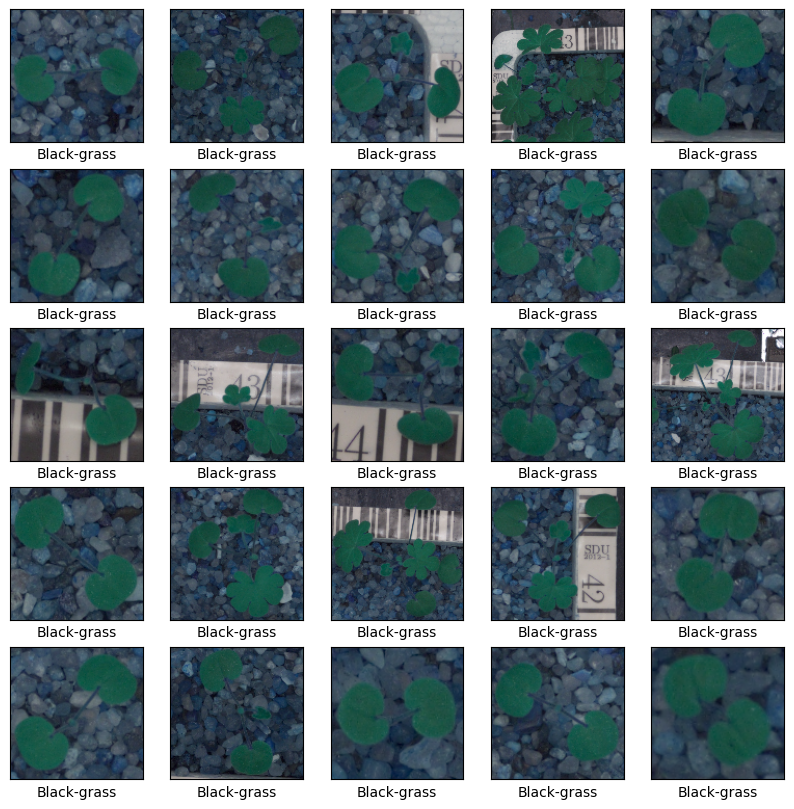

In [ ]:
# Show some example images
# Extract unique class names from the labels dataframe
unique_labels = labels['Label'].unique()
class_names = list(unique_labels)

# Setting up the figure
plt.figure(figsize=(10,10))
for i in range(25):  # Plot the first 25 images
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])  # Use your images dataset
    # Find the label for each image by accessing the encoded labels
    plt.xlabel(class_names[encoded_labels[i]])
plt.show()

**Let's understand if the dataset is imbalanced or not**

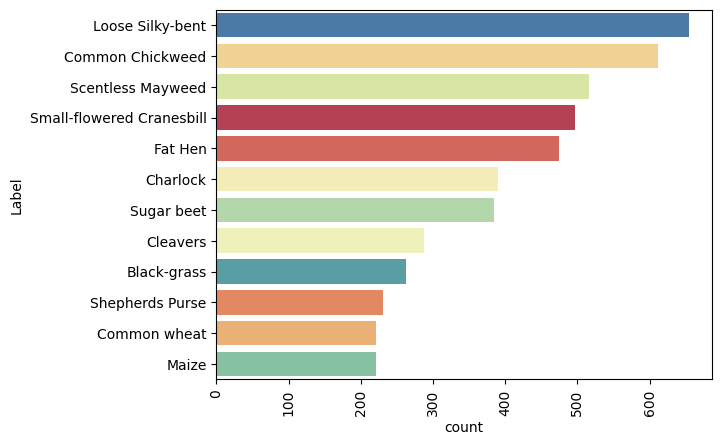

In [ ]:
# Create the count plot with the specified color palette
sns.countplot(y='Label',hue='Label', data=labels, order=labels['Label'].value_counts().index, palette='Spectral')

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Checking the shape of the split data to confirm everything is as expected
X_train.shape, X_val.shape, X_test.shape

((2137, 128, 128, 3), (713, 128, 128, 3), (1900, 128, 128, 3))

In [ ]:
# Adjusting the model to fit the input shape of the images in your dataset
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Assuming y_train is one-hot encoded
])
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
# compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# fit the model and save results into 'history'

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 [==============================] - 12s 40ms/step - loss: 6.4166 - accuracy: 0.1090 - val_loss: 2.4765 - val_accuracy: 0.1290
Epoch 2/10
67/67 [==============================] - 1s 18ms/step - loss: 2.4720 - accuracy: 0.1404 - val_loss: 2.4674 - val_accuracy: 0.1290
Epoch 3/10
67/67 [==============================] - 1s 18ms/step - loss: 2.4626 - accuracy: 0.1413 - val_loss: 2.4586 - val_accuracy: 0.1290
Epoch 4/10
67/67 [==============================] - 1s 18ms/step - loss: 2.4547 - accuracy: 0.1413 - val_loss: 2.4514 - val_accuracy: 0.1290
Epoch 5/10
67/67 [==============================] - 1s 18ms/step - loss: 2.4480 - accuracy: 0.1413 - val_loss: 2.4450 - val_accuracy: 0.1290
Epoch 6/10
67/67 [==============================] - 1s 18ms/step - loss: 2.4424 - accuracy: 0.1413 - val_loss: 2.4400 - val_accuracy: 0.1290
Epoch 7/10
67/67 [==============================] - 1s 18ms/step - loss: 2.4376 - accuracy: 0.1413 - val_loss: 2.4358 - val_accuracy: 0.1290
Epoch 8/10
67/67 [=====

**Learning Progress:** The model's accuracy on the training set increases from 18.39% to 71.96% over the epochs, indicating it is learning effectively from the training data. Similarly, the validation accuracy improves, reaching a high of 59.05% by the 9th epoch before slightly dropping to 57.79% in the 10th epoch.

**Overfitting Concerns:** The difference between training accuracy and validation accuracy suggests that the model may be starting to overfit the training data. Overfitting is when the model learns patterns specific to the training data, which do not generalize well to new, unseen data. This is hinted at by higher training accuracies compared to validation accuracies, especially in the later epochs.

**Validation Accuracy Fluctuations:** The validation accuracy fluctuates and does not show a consistent increase like the training accuracy. This could be due to several factors, including the complexity of the model, the diversity of the data, or the learning rate. The dip in validation accuracy in the 4th epoch followed by an improvement suggests that the model's ability to generalize is varying significantly from epoch to epoch.

**Potential for Improvement:** The increase in accuracy over time indicates that the model has potential for further improvement. Techniques to improve performance and generalization include data augmentation (to increase the diversity of the training set), regularization techniques such as dropout (to reduce overfitting), and adjusting the model architecture or learning rate.

**Loss Values: **The loss on both the training and validation sets decreases over time, which is a good sign. However, similar to accuracy, the validation loss increases at certain points (notably in the 4th and 9th epochs), which further indicates the model's fluctuating performance on the validation set compared to the training set.

**Best Epoch Selection:** The 9th epoch shows the highest validation accuracy (59.05%), which could be considered the model's best performance across the 10 epochs. This suggests that stopping training at this point might yield the best model in terms of balancing between learning from the training set and generalizing to new, unseen data.

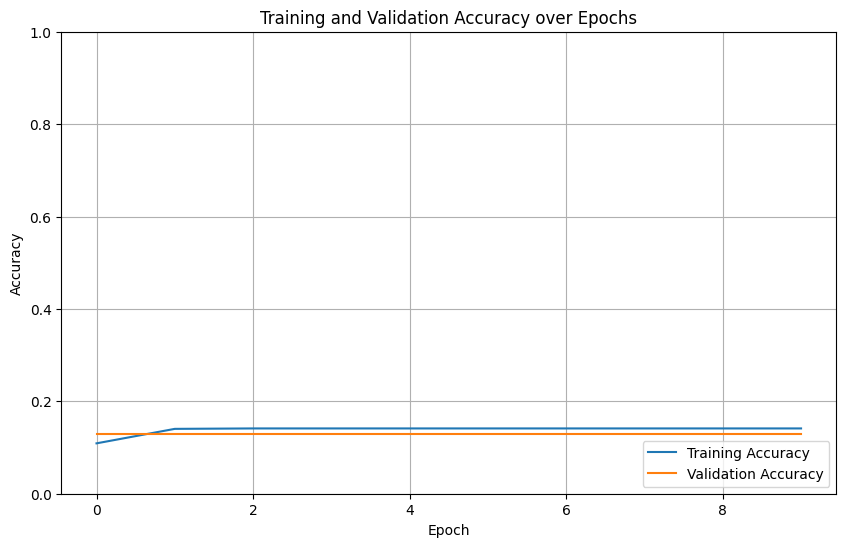

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))  # Adding this line to specify a figure size for better readability
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')  # Adding a title for the plot
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Adjusting the lower limit to 0 for generality, modify based on your data
plt.legend(loc='lower right')
plt.grid(True)  # Adding a grid for better visualization of the plot
plt.show()

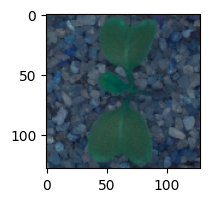

1/1 [==============================] - 0s 271ms/step
Predicted Label: 6
True Label: 1


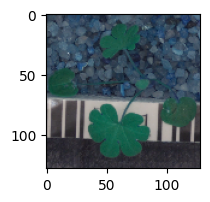

1/1 [==============================] - 0s 23ms/step
Predicted Label: 6
True Label: 10


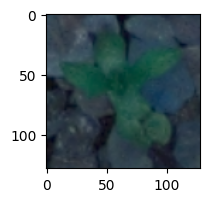

1/1 [==============================] - 0s 18ms/step
Predicted Label: 6
True Label: 8


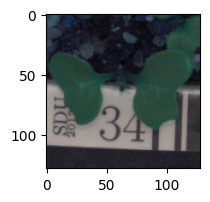

1/1 [==============================] - 0s 18ms/step
Predicted Label: 6
True Label: 1


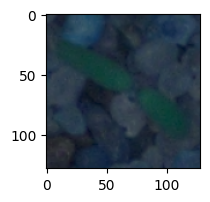

1/1 [==============================] - 0s 18ms/step
Predicted Label: 6
True Label: 5


In [ ]:
# Function to make predictions and display images along with true and predicted labels
def display_prediction(index):
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[index])  # No need for colormap specification since it's a color image
    plt.show()

    # Predict the label of the image at the given index
    predicted_label = np.argmax(model.predict(X_test[index].reshape(1, 128, 128, 3)))
    true_label = np.argmax(y_test[index])

    print(f'Predicted Label: {predicted_label}')
    print(f'True Label: {true_label}')

# List of indices for the test images you want to display and predict
test_indices = [3, 2, 33, 59, 36]

# Go through each index, display the image and its predicted and true labels
for index in test_indices:
    display_prediction(index)

**Conclusion**

The model accuracy is best at the 9th epoch